In [ ]:
# view PE coeff

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tables
import h5py
from scipy.spatial.distance import pdist, squareform
import os

/home/douwei/Recon1t/calib/Note


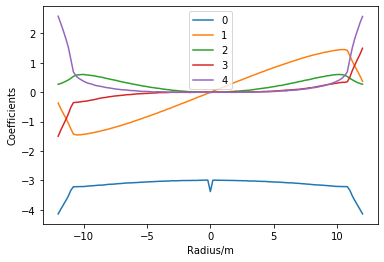

In [8]:
import os
import tables
print(os.getcwd())
def findfile(radius):
    filename = '../coeff_pe/5kt_' + radius + '.h5'
    #print(filename)
    h = tables.open_file(filename,'r')
    coeff = np.array(h.root.coeff)[:]
    expect = np.array(h.root.mean)[:]
    predict = np.array(h.root.predict)[:]
    h.close()
    return coeff, expect, predict
coeff = [];
expect = [];
predict = [];
for i in np.arange(12,-12.2,-0.2):
    file_str = '%+.2f' % i
    a1,a2,a3 = findfile(file_str)
    coeff.append(a1)
    expect.append(a2)
    predict.append(a3)
pe_coeff = np.array(coeff)
radius = np.arange(12,-12.2,-0.2)
plt.plot(radius, pe_coeff)
plt.xlabel('Radius/m')
plt.ylabel('Coefficients')

plt.legend(range(5))
plt.show()

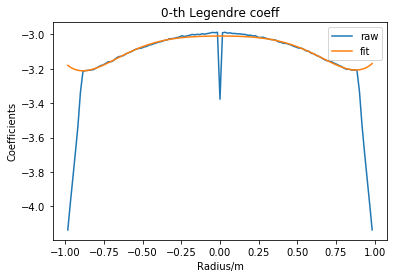

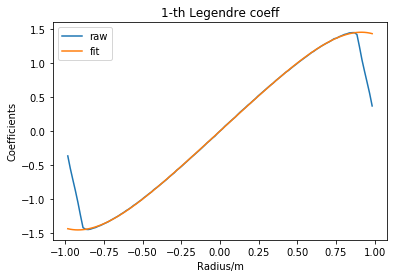

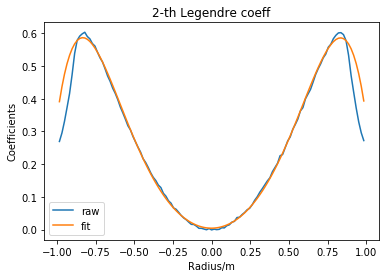

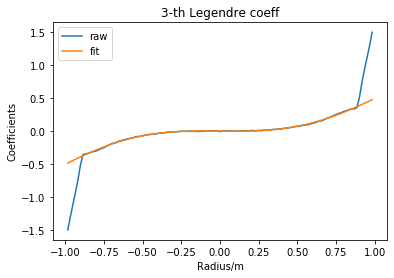

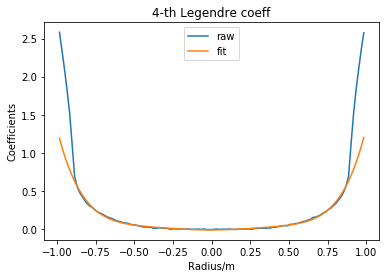

[[-3.09278864e+00  1.52447050e-03 -1.59889838e-01  2.71286640e-03
   4.64364788e-02  1.59608321e-03  4.52387010e-02]
 [-3.48103105e-04  1.76350797e+00 -2.75714223e-04 -2.84889631e-01
  -1.66104092e-03 -5.28066806e-02 -7.72962172e-04]
 [ 2.84723939e-01  6.47993192e-05  4.21754449e-01  1.12841097e-04
  -2.68405744e-01  1.21347352e-03 -9.92557415e-02]
 [-1.40287861e-04  3.23344641e-01 -2.42547053e-03  1.99638528e-01
  -2.22760397e-03 -2.54100378e-02 -5.17524918e-04]
 [ 1.99715541e-01  1.45073146e-03  6.25013091e-01  2.15445489e-03
   3.76404484e-01  1.92269360e-03  1.25024645e-01]]
/home/douwei/Recon1t/calib/Note
[-3.09278864e+00  1.52447050e-03 -1.59889838e-01  2.71286640e-03
  4.64364788e-02  1.59608321e-03  4.52387010e-02]


In [90]:
k1 = np.zeros((5,7))
radius = np.arange(12,-12.2,-0.2)
for i in np.arange(np.size(pe_coeff[0])):
    data = np.nan_to_num(pe_coeff[:,i])
    x = radius/12.2
    plt.plot(x, data)
    '''
    a = np.polyfit(x, data, 8)
    print(a)
    b = np.poly1d(a)
    c = b(x)
    plt.plot(x,c)'''
    index = (x<0.9) & (x>-0.9) & (x!=0)
    c = np.polynomial.legendre.legfit(x[index], data[index], 6)
    k1[i,:] = c
    plt.plot(x, np.polynomial.legendre.legval(x,c))

    plt.xlabel('Radius/m')
    plt.ylabel('Coefficients')
    plt.title(str(i)+'-th Legendre coeff')
    plt.legend(['raw','fit'])
    plt.show()
print(k1)
print(os.getcwd())    
with h5py.File('../PE_coeff.h5','w') as out:
    out.create_dataset('coeff', data = k1)
print(k1[0])

[ 1.31441274e-16  9.03319879e-01 -5.32807807e-17]


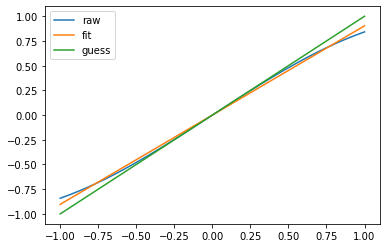

In [10]:
x = np.linspace(-1,1,1000)
y = np.sin(x)
plt.plot(x,y)
c = np.polynomial.legendre.legfit(x, y, 2)
print(c)
plt.plot(x, np.polynomial.legendre.legval(x,c))
plt.plot(x, np.polynomial.legendre.legval(x,[0,1,0]))
plt.legend(['raw','fit','guess'])

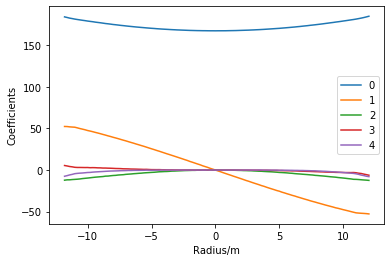

In [80]:
def findfile(radius):
    filename = '../coeff_time/5kt_' + radius + '.h5'
    #print(filename)
    h = tables.open_file(filename,'r')
    coeff = np.array(h.root.coeff)[:]
    h.close()
    return coeff
coeff = [];
for i in np.arange(12,-12,-0.2):
    file_str = '%+.2f' % i
    coeff.append(findfile(file_str))

time_coeff = np.array(coeff)
radius = np.arange(12,-12,-0.2)
plt.plot(radius, time_coeff)
plt.xlabel('Radius/m')
plt.ylabel('Coefficients')
plt.legend(range(5))
plt.show()

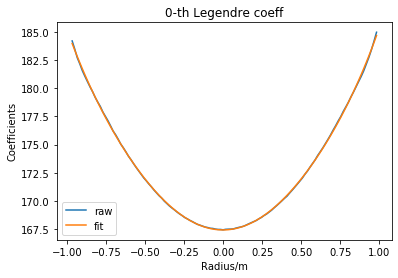

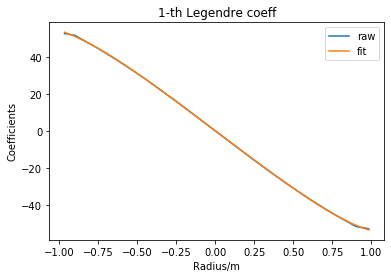

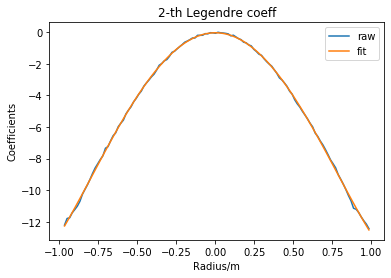

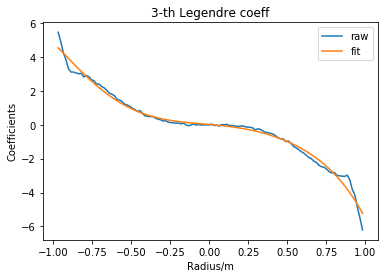

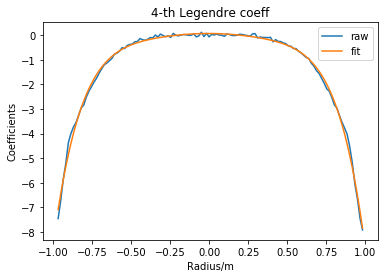

/home/douwei/Recon1t/calib/Note
[1.73347729e+02 9.98137753e-03 1.17096197e+01 1.99203982e-02
 7.58599925e-03 2.62765547e-02 1.96977249e-01]


In [86]:
import h5py
k1 = np.zeros((5,7))
radius = np.arange(12,-12,-0.2)
for i in np.arange(np.size(time_coeff[0])):
    data = np.nan_to_num(time_coeff[:,i])
    x = radius/12.2
    plt.plot(x, data)
    '''
    a = np.polyfit(x, data, 8)
    print(a)
    b = np.poly1d(a)
    c = b(x)
    plt.plot(x,c)'''
    c = np.polynomial.legendre.legfit(x, data, 6)
    k1[i,:] = c
    plt.plot(x, np.polynomial.legendre.legval(x,c))

    plt.xlabel('Radius/m')
    plt.ylabel('Coefficients')
    plt.title(str(i)+'-th Legendre coeff')
    plt.legend(['raw','fit'])
    plt.show()
print(os.getcwd())   
print(k1[0])
with h5py.File('../Time_coeff.h5','w') as out:
    out.create_dataset('coeff', data = k1) 
    


/opt/gentoo/usr/bin/python3.6
[ 1.31441274e-16  9.03319879e-01 -5.32807807e-17]


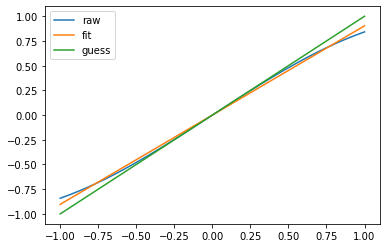

In [4]:
import sys
import numpy as np
import matplotlib.pyplot as plt
print(sys.executable)
x = np.linspace(-1,1,1000)
y = np.sin(x)
plt.plot(x,y)
c = np.polynomial.legendre.legfit(x, y, 2)
print(c)
plt.plot(x, np.polynomial.legendre.legval(x,c))
plt.plot(x, np.polynomial.legendre.legval(x,[0,1,0]))
plt.legend(['raw','fit','guess'])
plt.show()

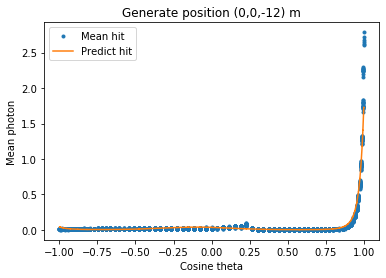

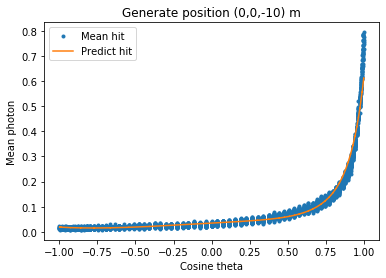

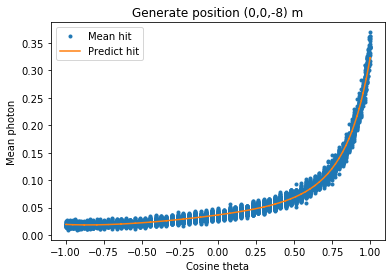

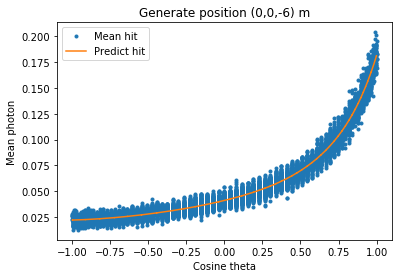

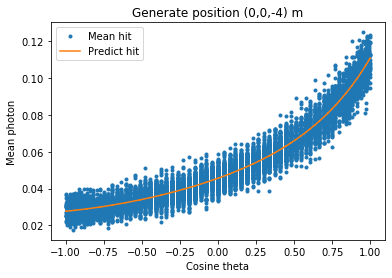

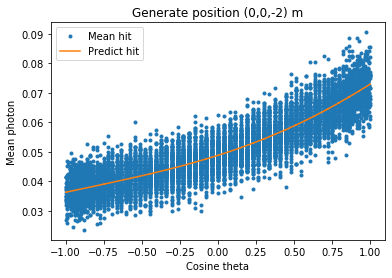

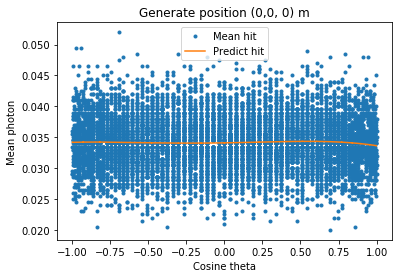

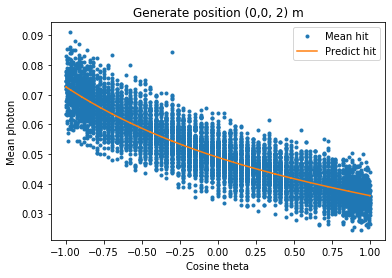

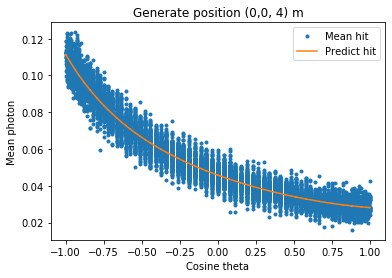

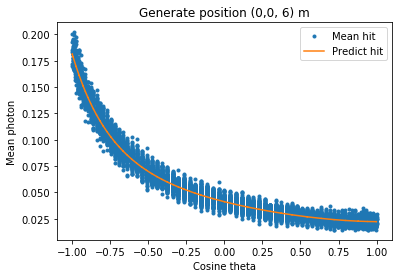

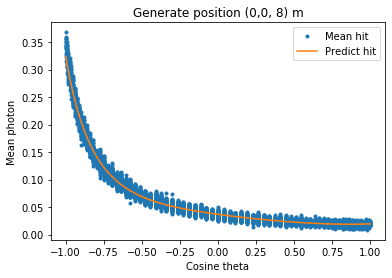

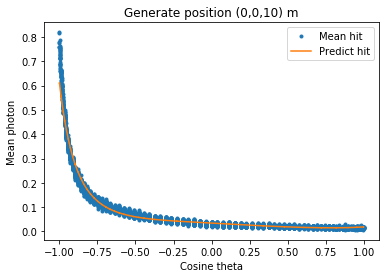

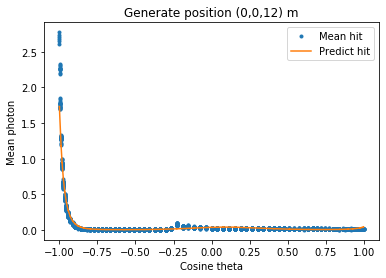

In [29]:
def ReadPMT(geo):
    f = open(r'../PMT_' + geo + '.txt')
    line = f.readline()
    data_list = []
    while line:
        num = list(map(float,line.split()))
        data_list.append(num)
        line = f.readline()
    f.close()
    PMT_pos = np.array(data_list)
    PMT_pos = PMT_pos[:,1:4]
    return PMT_pos
PMT_pos = ReadPMT('5kt')
vertex = np.array([0,0,10])
cos_theta = np.sum(vertex*PMT_pos,axis=1)\
    /np.sqrt(np.sum(vertex**2)*np.sum(PMT_pos**2,axis=1))
for i in np.arange(0,121,10):
    plt.plot(cos_theta, expect[i],'.')
    plt.plot(cos_theta, predict[i])
    plt.xlabel('Cosine theta')
    plt.ylabel('Mean photon')
    plt.title('Generate position (0,0,%2.f) m' % (i*0.2-12))
    plt.legend(['Mean hit','Predict hit'])
    plt.show()

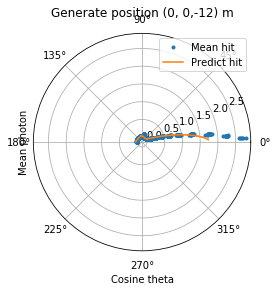

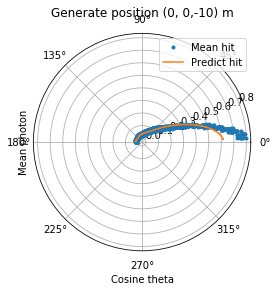

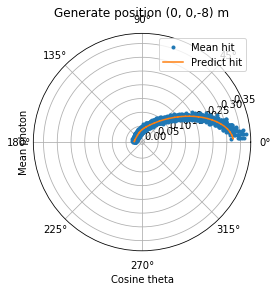

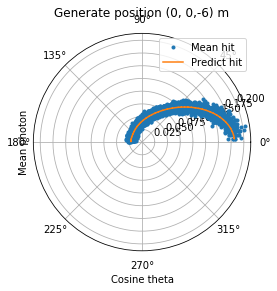

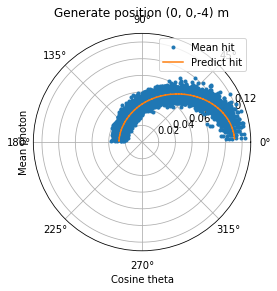

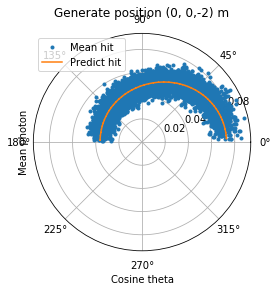

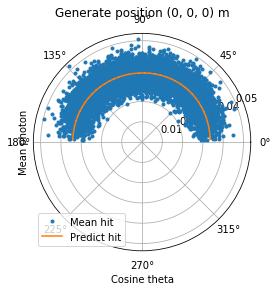

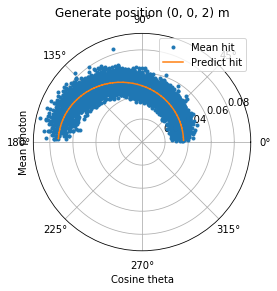

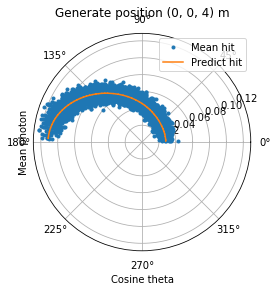

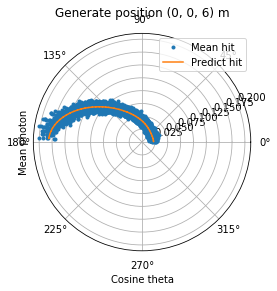

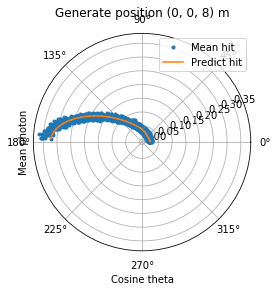

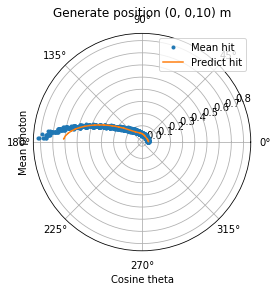

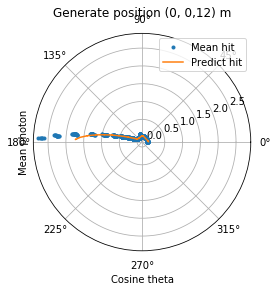

In [40]:
for i in np.arange(0,121,10):
    fig, ax = plt.subplots(subplot_kw=dict(projection='polar'))
    ax.plot(np.arccos(cos_theta), expect[i],'.')
    ax.plot(np.arccos(cos_theta), predict[i])
    plt.xlabel('Cosine theta')
    plt.ylabel('Mean photon')
    plt.title('Generate position (0, 0,%2.f) m' % (i*0.2-12))
    plt.legend(['Mean hit','Predict hit'])
    plt.show()

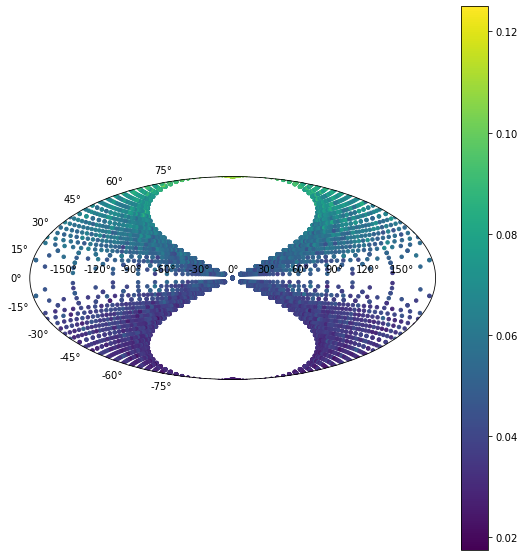

In [75]:
vertex = np.array([0,0,10])
cos_theta = np.sum(vertex*PMT_pos,axis=1)\
    /np.sqrt(np.sum(vertex**2)*np.sum(PMT_pos**2,axis=1))
phi = np.arctan(PMT_pos[:,2]/(PMT_pos[:,1]+1e-3))
plt.figure(figsize=(20,10))
plt.subplot(1,2,1,projection="aitoff")
plt.scatter(np.transpose(phi)*np.pi,cos_theta*np.pi/2,s=12, c=expect[40])
plt.colorbar()

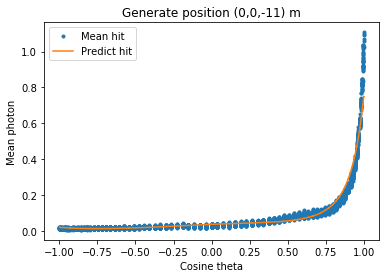

In [78]:
i=7
plt.plot(cos_theta, expect[i],'.')
plt.plot(cos_theta, predict[i])
plt.xlabel('Cosine theta')
plt.ylabel('Mean photon')
plt.title('Generate position (0,0,%2.f) m' % (i*0.2-12))
plt.legend(['Mean hit','Predict hit'])
plt.show()

In [79]:
coeff

[array([184.96646214, -52.75406316, -12.42956289,  -6.20861156,
         -7.92430509]),
 array([184.16790181, -52.40662666, -12.14340342,  -5.5151982 ,
         -7.43564179]),
 array([183.40855707, -52.1684506 , -11.9329484 ,  -4.88041656,
         -6.65731348]),
 array([182.73320297, -51.97728568, -11.68901081,  -4.15108881,
         -6.0514209 ]),
 array([182.13861582, -51.74831128, -11.40976866,  -3.81394598,
         -5.19170871]),
 array([181.54843936, -51.46916927, -11.20325115,  -3.24616519,
         -4.53974934]),
 array([181.04248717, -50.74548672, -11.14131346,  -2.97322463,
         -4.036473  ]),
 array([180.59037081, -49.96985033, -10.66833296,  -3.05135581,
         -3.78117939]),
 array([180.12987524, -49.16311318, -10.3357452 ,  -3.03287838,
         -3.54495146]),
 array([179.66405824, -48.41325289,  -9.96037598,  -3.01327427,
         -3.27182737]),
 array([179.23720257, -47.68328872,  -9.61790081,  -2.99123266,
         -2.96313403]),
 array([178.76182399, -46.861086